# Offline Evaluation Metrics Visualizations
This notebook visualizes user-specific performance metrics of various recommenders in the mind-small dataset to assess effectiveness and ranking overlap. We explore two metric groups:
1. **Effectiveness Metrics**: We use ranking-based metrics, Normalized Discounted Cumulative Gain (NDCG) and Reciprocal Rank (RR), to evaluate recommender effectiveness.
2. **Ranking Overlap Metrics**: We use Rank-Based Overlap (RBO) to assess consistency in top-k recommendations relative to final rankings.

## 1. Setup

### 1. 1 Importing Libraries

PyData packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Local code:

In [2]:
from IPython.display import HTML

from poprox_recommender.eval_tables import EvalTable

Set up progress:

In [3]:
from tqdm.autonotebook import tqdm as notebook_tqdm

/tmp/ipykernel_361739/2439040576.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm as notebook_tqdm


### 1. 2 Loading Data

In [4]:
mind_small_user_metrics = pd.read_csv("../outputs/mind-small/profile-metrics.csv.gz")
mind_small_user_metrics.head()

,Unnamed: 0,profile_id,recommender,personalized,NDCG@5,NDCG@10,RR,RBO@5,RBO@10
0,0,0001b413-8cad-5037-bab0-aa7e68a9b98a,nrms,True,0.215338,0.373071,0.2,0.409510,0.651322
1,1,0001b413-8cad-5037-bab0-aa7e68a9b98a,mmr,True,0.000000,0.150515,0.1,0.203347,0.292404
2,2,0001b413-8cad-5037-bab0-aa7e68a9b98a,pfar,True,0.215338,0.373071,0.2,0.409510,0.651322
3,3,0001b413-8cad-5037-bab0-aa7e68a9b98a,topic-cali,True,0.215338,0.373071,0.2,0.409510,0.651322
4,4,0001b413-8cad-5037-bab0-aa7e68a9b98a,locality-cali,True,0.215338,0.373071,0.2,0.409510,0.651322


In [5]:
effectiveness_metrics = ["NDCG@5", "NDCG@10", "RR"]
overlap_metrics = ["RBO@5", "RBO@10"]

## 2. Results

### 2. 1 Effectiveness Metrics
NDCG measures how well the recommendations align with user test data, focusing on the top-k positions, such as the top 5 (NDCG@5) or top 10 (NDCG@10). Likewise, RR evaluates how well the recommender finds the most relevant item as the top result.

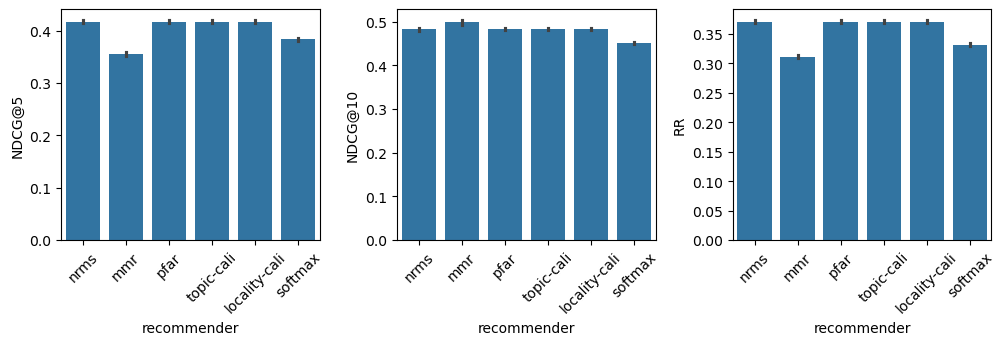

In [6]:
plt.figure(figsize=(12, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(effectiveness_metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=mind_small_user_metrics, x="recommender", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for effectiveness metrics across recommenders.

In [7]:
for metric in effectiveness_metrics:
    tw = EvalTable(mind_small_user_metrics, "recommender", metric, progress=notebook_tqdm)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]

Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [00:26<02:10, 26.07s/it]

Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [00:44<01:25, 21.35s/it]

Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [01:00<00:57, 19.04s/it]

Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [01:18<00:37, 18.54s/it]

Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [01:34<00:17, 17.70s/it]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:51<00:00, 17.62s/it]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:51<00:00, 18.65s/it]

Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]

Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [00:18<01:32, 18.43s/it]

Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [00:36<01:13, 18.46s/it]

Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [00:55<00:55, 18.49s/it]

Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [01:13<00:36, 18.39s/it]

Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [01:32<00:18, 18.38s/it]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:50<00:00, 18.35s/it]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:50<00:00, 18.39s/it]

quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

quantiles:  17%|████████████████████████▏                                                                                                                        | 1/6 [00:26<02:13, 26.67s/it]

quantiles:  33%|████████████████████████████████████████████████▎                                                                                                | 2/6 [00:52<01:44, 26.01s/it]

quantiles:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 3/6 [01:18<01:18, 26.29s/it]

quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 4/6 [01:45<00:52, 26.41s/it]

quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 5/6 [02:12<00:26, 26.47s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:38<00:00, 26.54s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:38<00:00, 26.45s/it]

"locality-cali 0.417(0.414,0.420)","0.411(0.410,0.412)","0.000(0.000,0.000)","0.431(0.402,0.431)","1.000(1.000,1.000)",
"mmr 0.356(0.352,0.360)","0.533(0.527,0.538)","0.000(0.000,0.000)","0.000(0.000,0.000)","1.000(1.000,1.000)",
"nrms 0.417(0.414,0.420)","0.411(0.410,0.412)","0.000(0.000,0.000)","0.431(0.402,0.431)","1.000(1.000,1.000)",
"pfar 0.417(0.414,0.420)","0.411(0.410,0.412)","0.000(0.000,0.000)","0.431(0.402,0.431)","1.000(1.000,1.000)",
"softmax 0.383(0.381,0.386)","0.406(0.405,0.407)","0.000(0.000,0.000)","0.281(0.250,0.315)","1.000(1.000,1.000)",
"topic-cali 0.417(0.414,0.420)","0.411(0.410,0.412)","0.000(0.000,0.000)","0.431(0.402,0.431)","1.000(1.000,1.000)",


Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]

Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [00:17<01:29, 17.84s/it]

Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [00:35<01:11, 17.79s/it]

Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [00:52<00:51, 17.24s/it]

Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [01:08<00:33, 16.85s/it]

Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [01:26<00:17, 17.14s/it]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:43<00:00, 17.24s/it]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:43<00:00, 17.25s/it]

Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]

Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [00:18<01:31, 18.25s/it]

Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [00:36<01:13, 18.38s/it]

Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [00:55<00:55, 18.36s/it]

Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [01:13<00:36, 18.35s/it]

Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [01:31<00:18, 18.35s/it]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:49<00:00, 18.31s/it]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:49<00:00, 18.33s/it]

quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

quantiles:  17%|████████████████████████▏                                                                                                                        | 1/6 [00:27<02:15, 27.13s/it]

quantiles:  33%|████████████████████████████████████████████████▎                                                                                                | 2/6 [00:54<01:49, 27.34s/it]

quantiles:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 3/6 [01:21<01:21, 27.17s/it]

quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 4/6 [01:48<00:54, 27.13s/it]

quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 5/6 [02:15<00:27, 27.19s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:42<00:00, 27.14s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:42<00:00, 27.17s/it]

"locality-cali 0.483(0.480,0.485)","0.370(0.369,0.371)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"mmr 0.498(0.493,0.504)","0.775(0.765,0.786)","0.000(0.000,0.000)","0.333(0.333,0.333)","1.000(1.000,1.000)",
"nrms 0.482(0.480,0.485)","0.370(0.369,0.371)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"pfar 0.483(0.480,0.485)","0.370(0.369,0.371)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"softmax 0.451(0.448,0.453)","0.369(0.367,0.370)","0.000(0.000,0.000)","0.387(0.387,0.387)","1.000(1.000,1.000)",
"topic-cali 0.483(0.480,0.485)","0.370(0.369,0.371)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",


Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]

Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [00:17<01:27, 17.42s/it]

Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [00:35<01:10, 17.55s/it]

Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [00:52<00:52, 17.52s/it]

Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [01:08<00:34, 17.07s/it]

Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [01:26<00:17, 17.28s/it]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:44<00:00, 17.36s/it]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:44<00:00, 17.35s/it]

Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]

Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [00:16<01:23, 16.62s/it]

Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [00:34<01:10, 17.59s/it]

Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [00:53<00:53, 17.92s/it]

Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [01:10<00:35, 17.54s/it]

Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [01:28<00:17, 17.79s/it]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:46<00:00, 17.98s/it]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:46<00:00, 17.79s/it]

quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

quantiles:  17%|████████████████████████▏                                                                                                                        | 1/6 [00:27<02:15, 27.11s/it]

quantiles:  33%|████████████████████████████████████████████████▎                                                                                                | 2/6 [00:53<01:47, 26.83s/it]

quantiles:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 3/6 [01:20<01:20, 26.86s/it]

quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 4/6 [01:47<00:53, 26.90s/it]

quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 5/6 [02:14<00:27, 27.03s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:41<00:00, 27.01s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:41<00:00, 26.97s/it]

"locality-cali 0.371(0.368,0.373)","0.359(0.358,0.361)","0.000(0.000,0.000)","0.250(0.250,0.250)","1.000(1.000,1.000)",
"mmr 0.311(0.309,0.314)","0.380(0.378,0.381)","0.000(0.000,0.000)","0.143(0.143,0.143)","1.000(1.000,1.000)",
"nrms 0.371(0.368,0.373)","0.359(0.358,0.361)","0.000(0.000,0.000)","0.250(0.250,0.250)","1.000(1.000,1.000)",
"pfar 0.371(0.368,0.373)","0.359(0.358,0.361)","0.000(0.000,0.000)","0.250(0.250,0.250)","1.000(1.000,1.000)",
"softmax 0.332(0.329,0.334)","0.341(0.340,0.343)","0.000(0.000,0.000)","0.200(0.200,0.200)","1.000(1.000,1.000)",
"topic-cali 0.371(0.368,0.373)","0.359(0.358,0.361)","0.000(0.000,0.000)","0.250(0.250,0.250)","1.000(1.000,1.000)",


### 2. 2 Ranking Overlap Metrics
RBO measures the similarity between two ranked lists, evaluating how much overlap exists between pure top-k recommendations and the actual rankings produced after recommendations. RBO can be applied at different list depths to analyze performance consistency, such as RBO@5 and RBO@10.

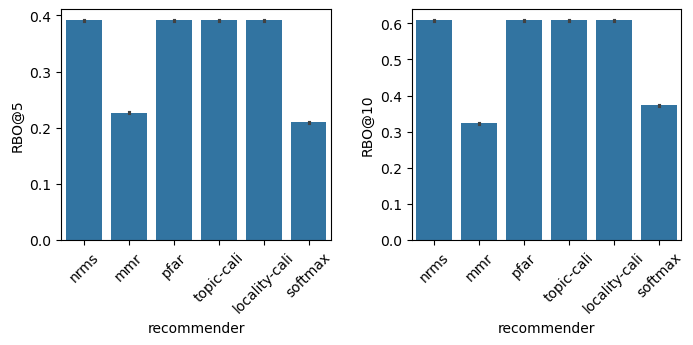

In [8]:
plt.figure(figsize=(8, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(overlap_metrics, 1):
    plt.subplot(1, 2, i)
    sns.barplot(data=mind_small_user_metrics, x="recommender", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for ranking overlap metrics across recommenders.

In [9]:
for metric in overlap_metrics:
    tw = EvalTable(mind_small_user_metrics, "recommender", metric, progress=notebook_tqdm)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]

Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [00:16<01:20, 16.02s/it]

Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [00:32<01:04, 16.07s/it]

Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [00:49<00:50, 16.77s/it]

Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [01:05<00:33, 16.51s/it]

Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [01:21<00:16, 16.33s/it]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:39<00:00, 16.74s/it]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:39<00:00, 16.57s/it]

Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]

Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [00:17<01:25, 17.01s/it]

Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [00:35<01:11, 17.89s/it]

Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [00:52<00:52, 17.43s/it]

Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [01:09<00:34, 17.22s/it]

Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [01:25<00:16, 16.99s/it]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:44<00:00, 17.47s/it]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:44<00:00, 17.38s/it]

quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

quantiles:  17%|████████████████████████▏                                                                                                                        | 1/6 [00:22<01:53, 22.78s/it]

quantiles:  33%|████████████████████████████████████████████████▎                                                                                                | 2/6 [00:50<01:41, 25.44s/it]

quantiles:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 3/6 [01:12<01:12, 24.26s/it]

quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 4/6 [01:35<00:47, 23.69s/it]

quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 5/6 [02:06<00:26, 26.14s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:28<00:00, 24.98s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:28<00:00, 24.83s/it]

"locality-cali 0.391(0.391,0.392)","0.073(0.072,0.074)","0.396(0.396,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"mmr 0.227(0.227,0.227)","0.058(0.057,0.059)","0.203(0.203,0.203)","0.203(0.203,0.203)","0.307(0.307,0.307)",
"nrms 0.391(0.391,0.392)","0.073(0.072,0.074)","0.396(0.396,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"pfar 0.391(0.391,0.392)","0.073(0.072,0.074)","0.396(0.396,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"softmax 0.210(0.209,0.211)","0.111(0.111,0.112)","0.044(0.044,0.058)","0.216(0.216,0.219)","0.364(0.351,0.364)",
"topic-cali 0.391(0.391,0.392)","0.073(0.072,0.074)","0.396(0.396,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",


Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]

Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [00:16<01:21, 16.28s/it]

Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [00:32<01:04, 16.15s/it]

Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [00:48<00:48, 16.11s/it]

Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [01:05<00:33, 16.67s/it]

Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [01:22<00:16, 16.48s/it]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:39<00:00, 16.86s/it]

Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:39<00:00, 16.61s/it]

Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]

Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [00:18<01:32, 18.56s/it]

Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [00:37<01:14, 18.56s/it]

Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [00:54<00:53, 17.90s/it]

Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [01:11<00:34, 17.48s/it]

Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [01:27<00:17, 17.22s/it]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:44<00:00, 17.09s/it]

Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:44<00:00, 17.45s/it]

quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

quantiles:  17%|████████████████████████▏                                                                                                                        | 1/6 [00:24<02:01, 24.22s/it]

quantiles:  33%|████████████████████████████████████████████████▎                                                                                                | 2/6 [00:53<01:48, 27.23s/it]

quantiles:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 3/6 [01:17<01:17, 25.87s/it]

quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 4/6 [01:42<00:50, 25.22s/it]

quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 5/6 [02:12<00:27, 27.12s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:36<00:00, 26.15s/it]

quantiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:36<00:00, 26.13s/it]

"locality-cali 0.608(0.607,0.609)","0.126(0.125,0.128)","0.525(0.525,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"mmr 0.323(0.322,0.323)","0.103(0.102,0.103)","0.235(0.235,0.235)","0.308(0.307,0.311)","0.453(0.453,0.453)",
"nrms 0.608(0.607,0.609)","0.126(0.125,0.128)","0.525(0.525,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"pfar 0.608(0.607,0.609)","0.126(0.124,0.128)","0.525(0.525,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"softmax 0.372(0.371,0.373)","0.145(0.145,0.146)","0.173(0.172,0.176)","0.381(0.380,0.384)","0.552(0.552,0.553)",
"topic-cali 0.608(0.607,0.609)","0.126(0.124,0.128)","0.525(0.525,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
